In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

In [ ]:
text = pd.read_csv('/content/final_dataset.csv')
text.head()

,text,label,source_model
0,"Dear Senator, I am writing to you today to exp...",1,palm
1,saint-andre anger at absent stars sale sharks ...,0,human_bbc
2,"In recent years, there has been a growing tren...",1,palm
3,Zoos have been a controversial topic for a lon...,1,llama
4,robots learn robotiquette rules robots are lea...,0,human_bbc


In [ ]:
text = text.drop(['source_model'], axis=1)
text.head()

,text,label
0,"Dear Senator, I am writing to you today to exp...",1
1,saint-andre anger at absent stars sale sharks ...,0
2,"In recent years, there has been a growing tren...",1
3,Zoos have been a controversial topic for a lon...,1
4,robots learn robotiquette rules robots are lea...,0


## Descriptive Analysis

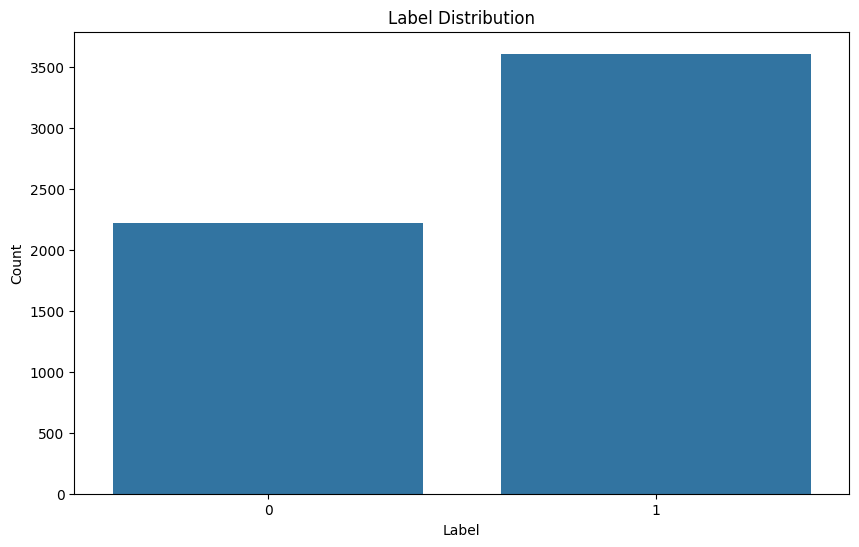

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='label', data=text)
plt.title('Label Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

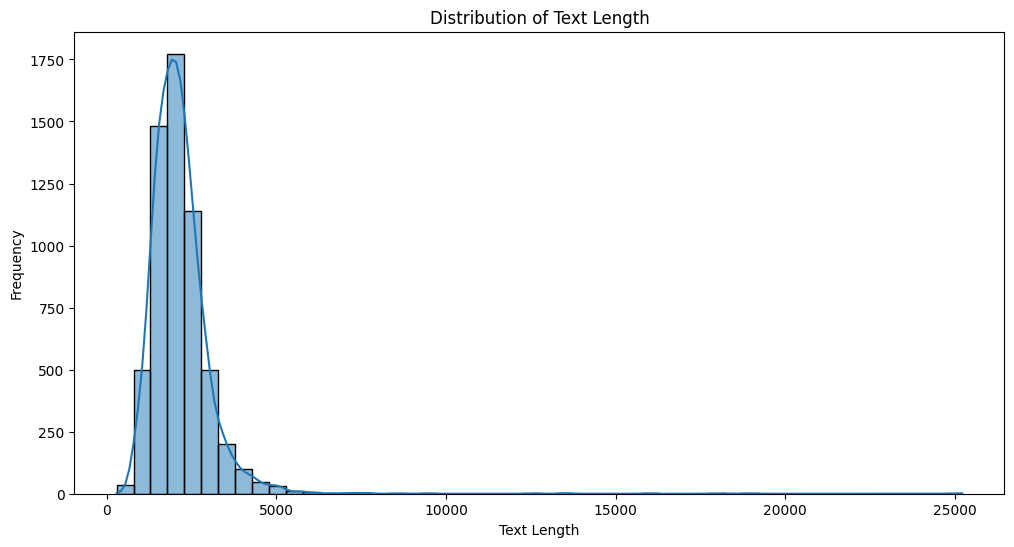

In [ ]:
text['text_length'] = text['text'].apply(len)

plt.figure(figsize=(12, 6))
sns.histplot(text['text_length'], bins=50, kde=True)
plt.title('Distribution of Text Length')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()


## Support Vector Classifier

In [ ]:
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)

X = vectorizer.fit_transform(text['text'])

y = text['label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
textclf = SVC(kernel='linear')
textclf.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
y_pred = textclf.predict(X_test)

In [ ]:
acc_score = accuracy_score(y_test, y_pred)
print("Accuracy:", acc_score)

print(classification_report(y_test, y_pred))

Accuracy: 0.9994288977727013
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       669
           1       1.00      1.00      1.00      1082

    accuracy                           1.00      1751
   macro avg       1.00      1.00      1.00      1751
weighted avg       1.00      1.00      1.00      1751



## Logistic Regression

In [ ]:
textlog = LogisticRegression()
textlog.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = textlog.predict(X_test)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9994288977727013
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       669
           1       1.00      1.00      1.00      1082

    accuracy                           1.00      1751
   macro avg       1.00      1.00      1.00      1751
weighted avg       1.00      1.00      1.00      1751



## Random Forest Classifier

In [ ]:
textrandom = RandomForestClassifier(n_estimators=500, max_depth = 5, random_state=42)
textrandom.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=500, random_state=42)

In [ ]:
y_pred = textrandom.predict(X_test)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9800114220445459
              precision    recall  f1-score   support

           0       1.00      0.95      0.97       669
           1       0.97      1.00      0.98      1082

    accuracy                           0.98      1751
   macro avg       0.98      0.97      0.98      1751
weighted avg       0.98      0.98      0.98      1751



## Decision Tree Classifier

In [ ]:
textdecision = DecisionTreeClassifier(random_state=42)
textdecision.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred = textdecision.predict(X_test)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9845802398629354
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       669
           1       0.98      0.99      0.99      1082

    accuracy                           0.98      1751
   macro avg       0.99      0.98      0.98      1751
weighted avg       0.98      0.98      0.98      1751



## K-Neighbor Classifier


In [ ]:
textknn = KNeighborsClassifier(n_neighbors=5)
textknn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = textknn.predict(X_test)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9914334665905197
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       669
           1       0.99      1.00      0.99      1082

    accuracy                           0.99      1751
   macro avg       0.99      0.99      0.99      1751
weighted avg       0.99      0.99      0.99      1751



## Multinomial Naive Bayes Classifier

In [ ]:
textnaive = MultinomialNB(alpha = 6.0)
textnaive.fit(X_train, y_train)

MultinomialNB(alpha=6.0)

In [ ]:
y_pred = textnaive.predict(X_test)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9748715019988577
              precision    recall  f1-score   support

           0       1.00      0.93      0.97       669
           1       0.96      1.00      0.98      1082

    accuracy                           0.97      1751
   macro avg       0.98      0.97      0.97      1751
weighted avg       0.98      0.97      0.97      1751



In [ ]:
def predict_category(text):
    """
    Predict the category of a given text using the trained classifier.
    """
    text_vec = vectorizer.transform([text])
    prediction = textclf.predict(text_vec)
    return prediction[0]

sample_text_to_predict = "This article discusses the latest advancements in artificial intelligence and machine learning."
predicted_category_result = predict_category(sample_text_to_predict)
print(f'The predicted category for the new sample text is: {predicted_category_result}')

The predicted category for the new sample text is: 0


##Citations

https://www.geeksforgeeks.org/nlp/text-classification-using-scikit-learn-in-nlp/

https://www.geeksforgeeks.org/machine-learning/ml-logistic-regression-using-python/

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html